# Develop a dataset creation process that also works for the conditional case:

The function that creates the dataset should take the following arguments:

- root directory in which the Weatherbench Dataset got installed
- startdate and enddate for each test- train- and validation set. Datetime objects.
- Variables: dict.

- delta_t between timesteps (int)
- lead_time (int, in terms of timesteps)
- conditioning_timesteps (list of ints)

As long as the dataset size still allows it, write the data to a single .pt file.

In [1]:
# from WD.datasets import write_conditional_datasets

# new refactored function:
from WD.datasets import write_conditional_datasets, Conditional_Dataset


# Write some example data sets.

In [2]:
write_conditional_datasets("/data/compoundx/WeatherDiff/config_file/template.yaml")

Load config file.
Open datasets.
Number of conditioning variables: 3
Number of constant variables: 1
Number of output variables: 2
Normalize datasets.
Slice into train, test and validation set and write to .pt files.
{'data_specs': {'conditioning_time_step': [0, -1, -2], 'delta_t': 6, 'lead_time': 1, 'spatial_resolution': '5.625deg', 'constants': ['orography'], 'conditioning_vars': {'total_precipitation': {'level': None}, 'geopotential': {'level': [50, 250]}}, 'output_vars': {'total_precipitation': {'level': None}, 'geopotential': {'level': [500]}}}, 'exp_data': {'train': {'from': '1979-01-02 00:00:00', 'to': '2015-12-31 00:00:00'}, 'test': {'from': '2017-01-01 00:00:00', 'to': '2018-12-31 00:00:00'}, 'val': {'from': '2016-01-01 00:00:00', 'to': '2016-12-31 00:00:00'}}, 'file_structure': {'dir_WeatherBench': '/data/compoundx/WeatherBench/', 'dir_model_input': '/data/compoundx/WeatherDiff/model_input/'}, 'ds_id': 'F01A8B', 'git-rev-parse': {'dm_zoo': 'a233ea15df1416edb47f8b3afc2478677f8

# Test Pytorch Datasets:

In [1]:
# from WD.datasets import Conditional_Dataset, Unconditional_Dataset

from WD.datasets import Conditional_Dataset

In [2]:
ds_train = Conditional_Dataset(
    pt_file_path="/data/compoundx/WeatherDiff/model_input/F61260_train.pt",
    config_file_path="/data/compoundx/WeatherDiff/config_file/F61260.yml"
)

# for old version, it would have been called like this:
# ds_train = Conditional_Dataset(pt_file_path="/data/compoundx/WeatherDiff/input_data/6A9C62_train.pt")

In [5]:
import matplotlib.pyplot as plt

In [6]:
input, target, time = ds_train[0]

In [11]:
input.shape

torch.Size([16, 32, 64])

In [18]:
input.squeeze()[2] == input.squeeze()[12]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

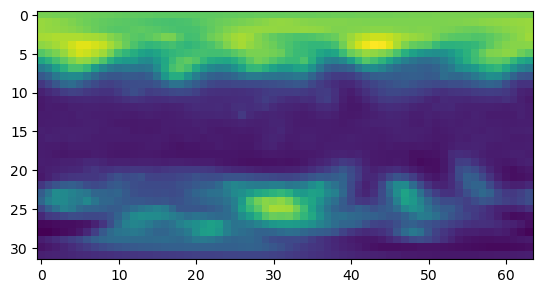

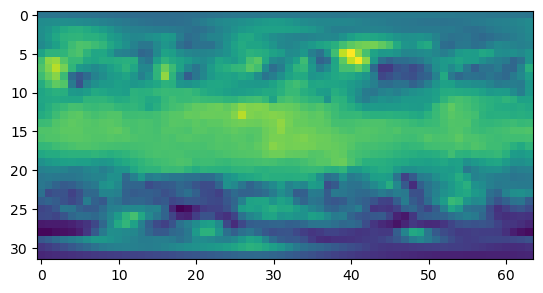

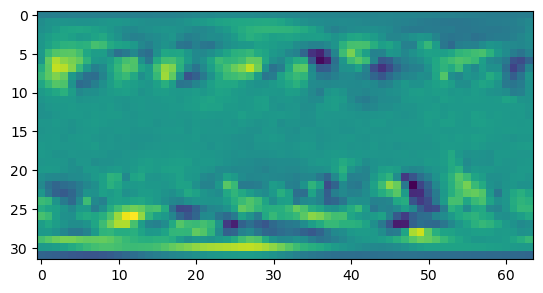

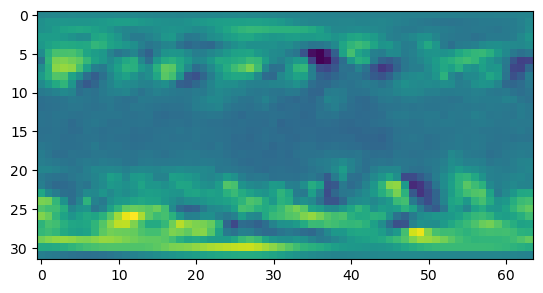

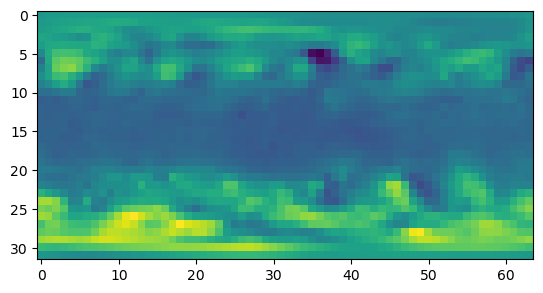

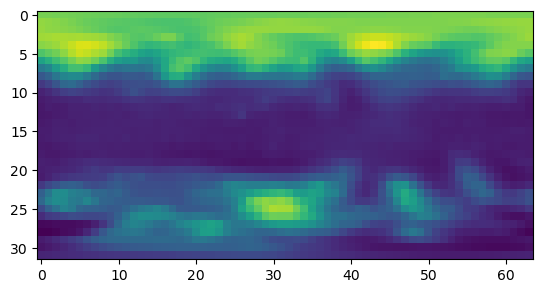

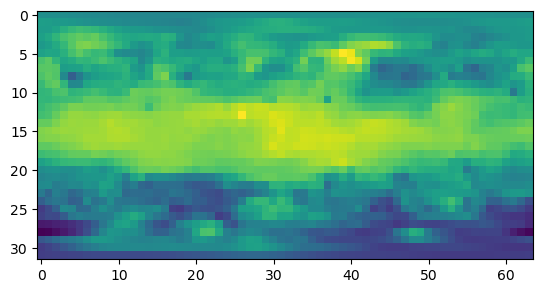

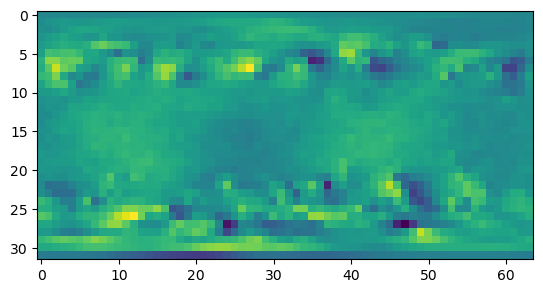

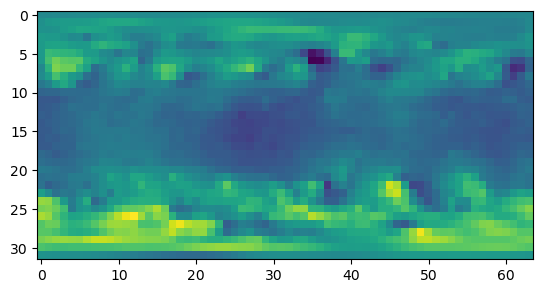

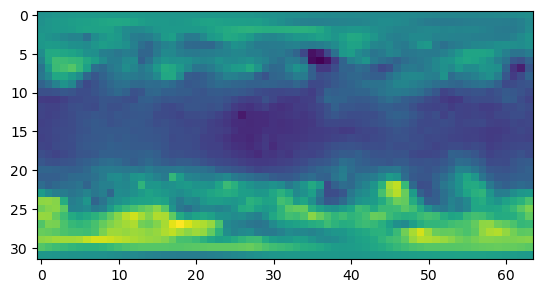

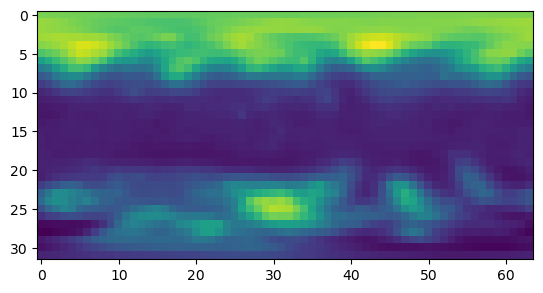

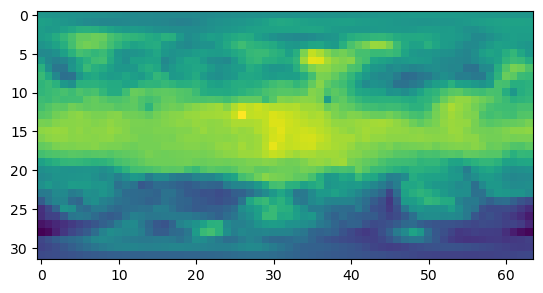

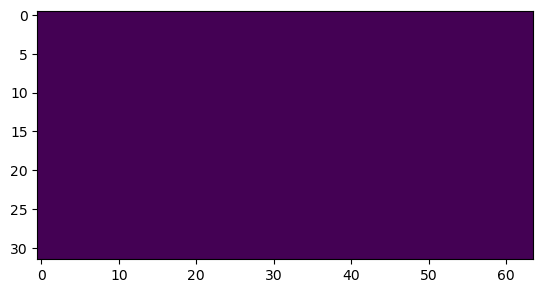

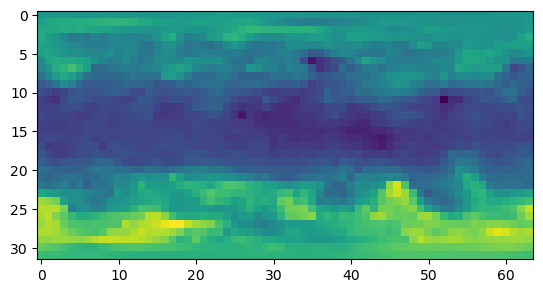

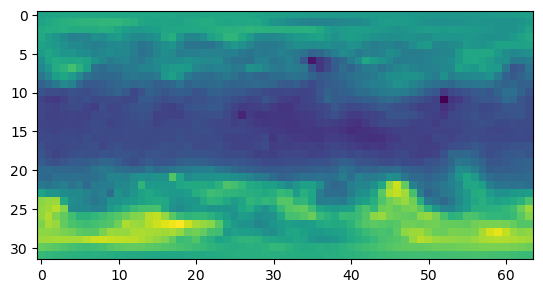

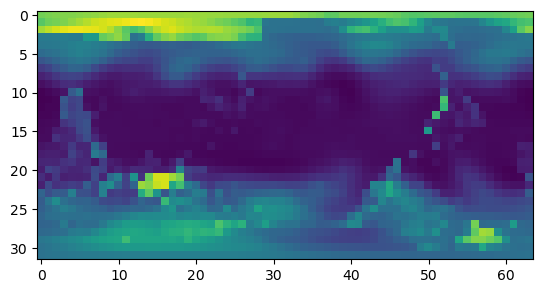

In [19]:
for i in range(input.shape[0]):

    plt.imshow(input.squeeze()[i]-target.squeeze())
    plt.show()

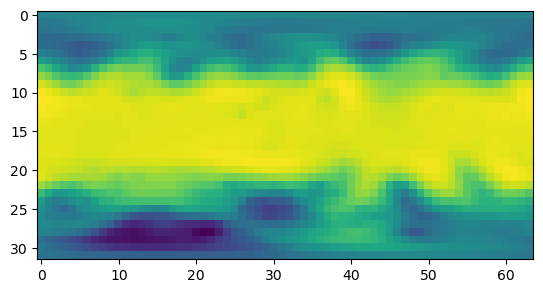

In [9]:
plt.imshow(target.squeeze())

# Test Min-Max:

In [5]:
import xarray as xr
import torch
import pandas as pd
import numpy as np

In [7]:
a = xr.open_dataset("/data/compoundx/WeatherDiff/model_input/F01A8B_output_min_max.nc")

In [9]:
a.z_500_min.values

array(42497.395, dtype=float32)